In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

# ABOUT THIS NOTEBOOK

## Created for Kaggle playground series season 3, episode 21 - 8.26.23
This notebooks will be in two sections 1) EDA and 2) Predictions, first will mostly consist of making plots and cleaning the data. And when the data is ready we can feed to the model to prediction.

In [3]:
df = pd.read_csv('sample_submission.csv')

In [4]:
df.head()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.00,9.545,9.265,8.110,8.43,7.15,0.180,...,4.95,1.730,1.800,4.800,3.15,10.665,10.465,16.645,5.75,10.37
1,1,9.10,13.533,40.90,8.770,9.265,6.015,10.07,7.15,1.107,...,20.05,9.530,7.695,4.550,6.95,2.040,5.200,5.725,2.95,2.23
2,2,8.21,3.710,5.42,8.770,9.265,4.550,10.07,7.15,0.020,...,4.58,3.025,3.960,4.935,4.95,4.725,6.075,6.750,3.50,3.17
3,3,8.39,8.700,8.10,9.500,9.200,5.200,8.67,6.67,0.280,...,8.45,2.070,1.730,6.300,4.70,3.500,6.200,8.670,2.90,7.37
4,4,8.07,8.050,8.65,7.960,9.265,3.290,10.07,7.15,0.360,...,2.02,1.730,0.760,4.800,4.97,3.950,2.800,8.400,3.50,3.90


In [5]:
df.isna().any()

id        False
target    False
O2_1      False
O2_2      False
O2_3      False
O2_4      False
O2_5      False
O2_6      False
O2_7      False
NH4_1     False
NH4_2     False
NH4_3     False
NH4_4     False
NH4_5     False
NH4_6     False
NH4_7     False
NO2_1     False
NO2_2     False
NO2_3     False
NO2_4     False
NO2_5     False
NO2_6     False
NO2_7     False
NO3_1     False
NO3_2     False
NO3_3     False
NO3_4     False
NO3_5     False
NO3_6     False
NO3_7     False
BOD5_1    False
BOD5_2    False
BOD5_3    False
BOD5_4    False
BOD5_5    False
BOD5_6    False
BOD5_7    False
dtype: bool

OK we don't have any null or na values.

### The official kaggle explanation
> This is a very different type of challenge! For this challenge, your task is to improve a dataset that is being used to train a random forest model; in other words, your submission will be training data, not predictions. A random forest model will be trained on your submission, used to make predictions, and then those predictions will be used to generate your score.

> The dataset for this competition is a synthetic dataset based off of the Dissolved oxygen prediction in river water dataset. You are free to use the original in any way that you find useful.

> Please see important information on the Evaluation tab about the model that will be trained on your submitted data.

> Good luck!

Now we have the current dataset which has only data from 7 stations and it is used to build a random forest model. __So first we need to create a Random Forest to compare the output__ and then augment the data by adding 8th station to df and running it again by the same random forest (or another) to see the differences.

Let's create a random forest model.

In [6]:
indicators = ['O2', 'NH4', 'NO2', 'NO3', 'BOD5']

In [7]:
def get_seven_stations(indicator):
    col_names = [indicator + '_' + str(i) for i in range(1, 8)]
    return col_names

In [8]:
get_seven_stations(indicators[4])

['BOD5_1', 'BOD5_2', 'BOD5_3', 'BOD5_4', 'BOD5_5', 'BOD5_6', 'BOD5_7']

In [9]:
oxgen_col = get_seven_stations(indicators[1])

In [10]:
df[oxgen_col]

,NH4_1,NH4_2,NH4_3,NH4_4,NH4_5,NH4_6,NH4_7
0,0.180,0.200,0.650,14.515,5.845,1.285,0.429
1,1.107,1.027,1.848,8.625,12.175,0.280,0.440
2,0.020,0.020,0.650,17.144,24.645,0.380,0.440
3,0.280,0.270,1.730,3.870,8.410,1.480,1.380
4,0.360,0.435,0.650,3.850,5.845,0.280,0.440
...,...,...,...,...,...,...,...
3495,0.565,0.565,3.960,2.400,5.550,0.429,0.440
3496,1.300,2.200,1.640,4.140,12.175,1.285,1.570
3497,0.430,0.400,1.848,1.800,7.625,0.310,0.844
3498,0.300,0.200,1.160,8.625,12.175,1.285,0.429


In [11]:
np.corrcoef(df['O2_1'],df['O2_2'])

array([[1.        , 0.20475417],
       [0.20475417, 1.        ]])

In [12]:
def corr (x,y):
    return np.corrcoef(x, y) [0][1]

def show_corr(df, a, b):
    x,y = df [a], df[b]
    plt.scatter (x,y, alpha=0.5, s=4)
    plt.title(f'{a} vs {b}; r: {corr (x, y) : .2f}')

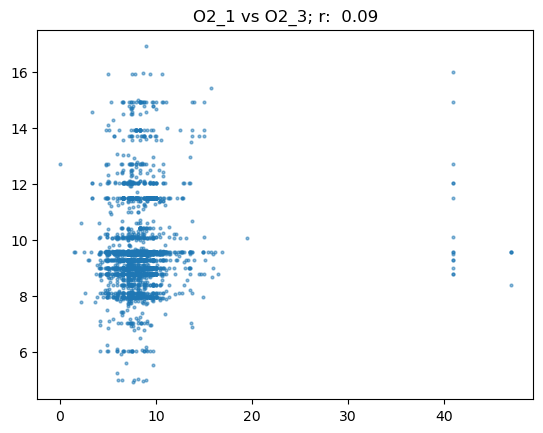

In [13]:
show_corr(df, 'O2_1','O2_3')

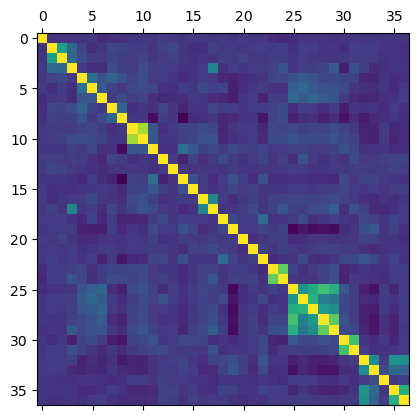

In [14]:
plt.matshow(df.corr())
plt.show()

I thought maybe there was a correlation between perhaps oxygen and nitrogen dioxide but there aren't any power connections, except for nitrate.

Let's check to TODO:

- [x] Look at the big picture.
- [x] Get the data.
- [x] Discover and visualize the data to gain insights.
- [ ] Prepare the data for Machine Learning algorithms.
- [ ] Select a model and train it.
- [ ] Fine-tune your model.
- [ ] Present your solution.
- [ ] Launch, monitor, and maintain your system.

### NOTE
This is part is quite useful, since it was the part where I learnt how to index columns, obviuosly with iloc. I wonder if it is also possible with 'loc'?

Another way which I thought up was to select like `df.iloc[:, 0]` and `df.iloc[:, 2:37]` and then add them to a big X df. More info on column based indexing on [Pandas Site](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html).

In [44]:
inx = np.ones((37))

In [45]:
inx[1] = 0

In [51]:
x_full = df.iloc[:, inx == True]

In [56]:
y_full = df.iloc[:, 1]
y_full.any() != df['target'].any()

False

In [62]:
np.max(y_full)

65.93

In [64]:
np.min(y_full)

# TODO test normalization

1.3

In [57]:
# Splitting the data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_full, y_full, test_size=0.2)

In [93]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

rf_classifier.fit(x_train, y_train)

RandomForestRegressor()

In [94]:
rf_preds = rf_classifier.predict(x_test)

In [95]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, rf_preds)

1.3228116414285722

old MSE = 1.1714004560857145

new MSE = 1.3228116414285722

In [96]:
len(y_test) == len(rf_preds)

True

In [97]:
err_values = []

for i in y_test:
    err = (y_test - rf_preds) ** 2
    err_values.append(err)
err

604     0.000044
1590    0.002070
347     1.649940
2325    0.110689
161     0.859514
          ...   
3145    1.436642
449     1.598960
283     0.655614
2102    1.460231
1451    1.411106
Name: target, Length: 700, dtype: float64

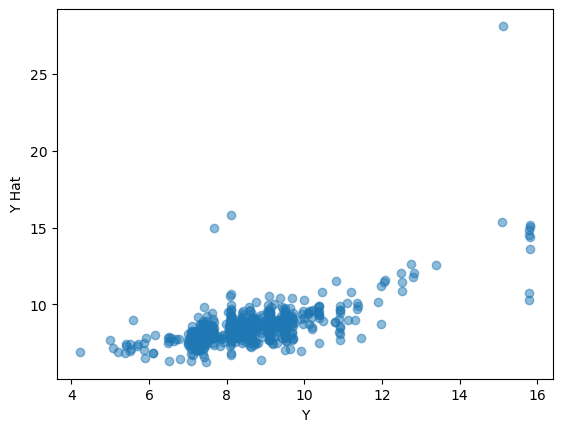

In [98]:
plt.scatter(y_test, rf_preds, alpha = 0.5)
# plt.xticks(ticks=[i for i in range(len(err_values))], labels=rf_preds)
plt.xlabel('Y')
plt.ylabel('Y Hat')
plt.show()

In [111]:
imporatnces = rf_classifier.feature_importances_

In [112]:
len(imporatnces)

36

([<matplotlib.axis.XTick at 0x7fc7dcd27910>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35')])

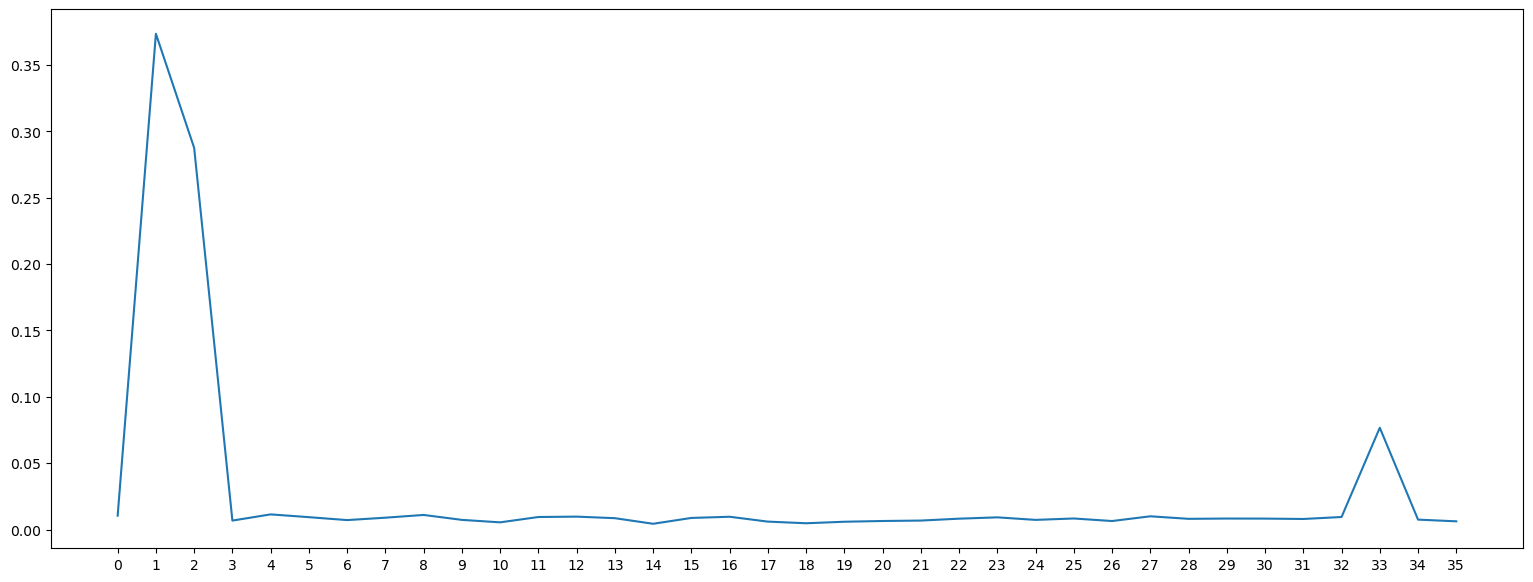

In [131]:
from matplotlib.pyplot import figure
figure(figsize=(19, 7))
plt.plot(imporatnces)
plt.xticks(np.arange(0, 36, step=1))

So the most importance columns are 2, 3, 34. Let's see what are these?

In [147]:
imporatnces = pd.Series(imporatnces)

In [159]:
imporatnces.sort_values(ascending=False, inplace=True)

In [152]:
imporatnces[imporatnces > imporatnces.mean()]

1     0.373537
2     0.287586
33    0.076680
dtype: float64

In [132]:
df.columns[[2, 3, 34]]

Index(['O2_1', 'O2_2', 'BOD5_5'], dtype='object')

Now I am going to train a Random Forest Regresson with only these three features and let's see how much MSE goes up? This will help to realize the real loss or lack of it by other feautres, maybe we could also combine other features imporatnce and compare but this is more fun.

In [204]:
minimal_train_data = []
minimal_test_data = []

for i in range(3, 18):
    minimal_inx = np.zeros_like(x_train.columns)
    minimal_inx[imporatnces[:i].index] = 1
    minimal_inx = minimal_inx == 1
    minimal_train_data.append(x_train.iloc[:, minimal_inx])
    minimal_test_data.append(x_test.iloc[:, minimal_inx])

In [205]:
all_features_mse = 1.3228116414285722


for i in range(0, len(minimal_test_data)):
    minimal_rf = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)
    
    
    minimal_rf.fit(minimal_train_data[i], y_train)
    minimal_preds = minimal_rf.predict(minimal_test_data[i])
    mse = mean_squared_error(y_test, minimal_preds)
    print(f'For the {i+3} features the mse is: {mse}')
    print(f'Compare to 36 features mse it is: ')
    print(f'{(all_features_mse-mse)}\n')

For the 3 features the mse is: 1.3232833197493163
Compare to 36 features mse it is: 
-0.00047167832074412885

For the 4 features the mse is: 1.3051850356373997
Compare to 36 features mse it is: 
0.01762660579117248

For the 5 features the mse is: 1.298113164491251
Compare to 36 features mse it is: 
0.0246984769373213

For the 6 features the mse is: 1.2904763938656119
Compare to 36 features mse it is: 
0.032335247562960356

For the 7 features the mse is: 1.2957372839214958
Compare to 36 features mse it is: 
0.02707435750707643

For the 8 features the mse is: 1.2931134855761022
Compare to 36 features mse it is: 
0.029698155852470043

For the 9 features the mse is: 1.2759689877041953
Compare to 36 features mse it is: 
0.046842653724376904

For the 10 features the mse is: 1.259769443442859
Compare to 36 features mse it is: 
0.0630421979857132

For the 11 features the mse is: 1.2653002922205046
Compare to 36 features mse it is: 
0.057511349208067664

For the 12 features the mse is: 1.266856

In [143]:
1.3232833197493163 - 1.3228116414285722

0.00047167832074412885

OK the 36 features version of model had a mse of 1.3228116414285722 and the new (minimal) model has only 1.3232833197493163, only 4 ten-thousandth for 33 extra features. The sweet spot is around 10 features but other than that it would be 5 and 3 features.

## Checking for Outliers

In [210]:
# 5 features

minimal_inx = np.zeros_like(x_train.columns)
minimal_inx[imporatnces[:5].index] = 1
minimal_inx = minimal_inx == 1
five_f = x_train.iloc[:, minimal_inx]

In [211]:
five_f

,O2_1,O2_2,O2_4,NH4_1,BOD5_5
492,7.300,40.900,6.370,0.210,6.750
1878,6.540,4.980,9.115,1.300,6.750
510,4.120,5.400,6.370,0.180,5.725
677,8.800,8.565,8.050,0.642,5.725
2661,7.367,40.900,9.115,0.247,5.500
...,...,...,...,...,...
746,9.700,8.933,11.475,0.240,8.400
2848,8.100,7.300,9.265,0.392,9.250
32,8.833,8.167,7.400,0.247,6.750
827,7.400,7.400,10.375,0.240,8.415


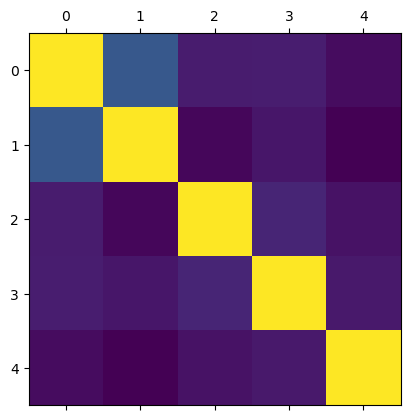

In [212]:
plt.matshow(five_f.corr())
plt.show()

In [216]:
five_f.describe()

,O2_1,O2_2,O2_4,NH4_1,BOD5_5
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,8.220693,9.167426,8.085610,0.340259,7.817023
std,3.066095,6.554263,1.445915,0.284042,3.742571
min,0.000000,0.000000,2.300000,0.020000,2.020000
25%,7.100000,7.300000,6.900000,0.210000,5.725000
50%,7.933000,8.300000,7.980000,0.247000,7.500000
75%,9.100000,8.700000,9.260000,0.370000,8.400000
max,46.950000,65.950000,21.800000,4.200000,82.450000


OK there are some jarring outliers, maybe let's get the ratio of how much data is outside of the IQR?

In [238]:
O21_cutoff = (five_f['O2_1'].quantile(0.99))
O22_cutoff = (five_f['O2_2'].quantile(0.9))
O24_cutoff = (five_f['O2_4'].quantile(0.9))
NH4_cutoff = (five_f['NH4_1'].quantile(0.9))
BOD5_cutoff = (five_f['BOD5_5'].quantile(0.9))

# Clip the last 10 percentiles

# TODO test normalization

In [233]:
print(len(five_f[five_f['O2_1'] <= O21_cutoff])/len(five_f)* 100)
print(len(five_f[five_f['O2_2'] <= O22_cutoff])/len(five_f)* 100)
print(len(five_f[five_f['O2_4'] <= O24_cutoff])/len(five_f)* 100)
print(len(five_f[five_f['NH4_1'] <= NH4_cutoff])/len(five_f)* 100)
print(len(five_f[five_f['BOD5_5'] <= BOD5_cutoff])/len(five_f)* 100)

90.10714285714285
90.25
93.67857142857143
90.42857142857143
90.35714285714286


I don't think this kind of mechanical cut off would be beneficial.

(array([2.638e+03, 9.800e+01, 1.100e+01, 5.100e+01, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 2.02 , 10.063, 18.106, 26.149, 34.192, 42.235, 50.278, 58.321,
        66.364, 74.407, 82.45 ]),
 <BarContainer object of 10 artists>)

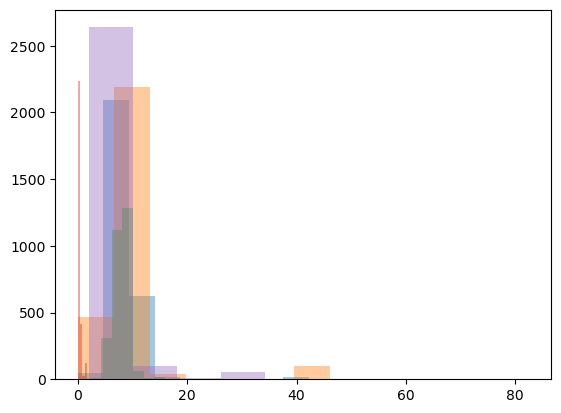

In [250]:
plt.hist(five_f['O2_1'], alpha=0.4)
plt.hist(five_f['O2_2'], alpha=0.4)
plt.hist(five_f['O2_4'], alpha=0.4)
plt.hist(five_f['NH4_1'], alpha=0.4)
plt.hist(five_f['BOD5_5'], alpha=0.4)

This is a skewed data, log might help us.